### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Code for Assignment Activites 1-3        


### More detailed observations covered in pdf report

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
Reviews=pd.read_csv(r'C:\Users\sabri\Google Drive\LSE Materials\Assignments\Course 3\Assignment Files\turtle_reviews.csv')


# View the DataFrame.
Reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Any missing values?
Reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
Reviews.info()
Reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [5]:
# Descriptive statistics.
Reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
Reviews_clean=Reviews.drop(['language','platform'], axis=1)

# View column names.
Reviews_clean.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [7]:
# Rename the column headers.
Reviews_clean.rename(columns={'remuneration (k£)':'remuneration','spending_score (1-100)':'spending_score'},inplace=True)
Reviews_clean.head()

# View column names.
Reviews_clean.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
Reviews_clean.to_csv(r'C:\Users\sabri\Google Drive\LSE Materials\Assignments\Course 3\Assignment Files\Reviews_clean.csv')


In [9]:
# Import new CSV file with Pandas.
Reviews=pd.read_csv(r'C:\Users\sabri\Google Drive\LSE Materials\Assignments\Course 3\Assignment Files\Reviews_clean.csv')


# View DataFrame.
Reviews_clean

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 5. Multiple Linear Regression

I am running a mlr as this was given as an option in the Assignment Activity: "Use linear regression or multiple linear regression and the statsmodels functions to evaluate possible linear relationships between loyalty points and age/remuneration/spending scores to determine whether these can be used to predict the loyalty points."

In [10]:
# Predictor variables. Age, Remuneration, Spending Score


# Outcome variable. Loyalty Points


# setting the variables and creating the mlr regression object
y=Reviews_clean['loyalty_points']
X=Reviews_clean[['age','remuneration','spending_score']]
mlr=linear_model.LinearRegression()


In [11]:
#fitting the mlr model
mlr.fit(X,y)

#calculating predicted values 
y_pred=mlr.predict(X)

#pringting the R^2, intercept value, and a list of predictors with their associated coefficients
print(mlr.score(X,y))
print(mlr.intercept_)
list(zip(X,mlr.coef_))


0.8399114912748796
-2203.0597513079


[('age', 11.060658711843358),
 ('remuneration', 34.008385492602486),
 ('spending_score', 34.183196577633645)]

In [12]:
#generating the regression model and displaying the summary table 
model=sm.OLS(y,sm.add_constant(X)).fit()
print(model.summary())

#calculating and displaying the squared distance between actual and predicted loyalty points 
print(metrics.mean_squared_error(y,y_pred))




                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:34:51   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2203.0598     52.361    -42.

C:\Users\sabri\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## 6. Observations and insights

***Your observations here...***






The overall regression model accounted for 84% of the variance in loyalty point totals. Knowing a person's age, income, and spending can be helpful in predicting their likely loyalty point totals. Income and spending score had similar modest magnitudes of predictive power of loyalty points - higher income and higher spending suggest higher loyalty point scores. Age is less strongly related to loyalty point totals, but there is a reliable association such that loyalty point totals increase slightly with age. 

# 

# Week 2 assignment: Clustering with *k*-means using Python



## 1. Load and explore the data

In [13]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

### Dataframe Reviews_clean is used, as above. Therefore, unecessary columns have already been dropped and the data explored

## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

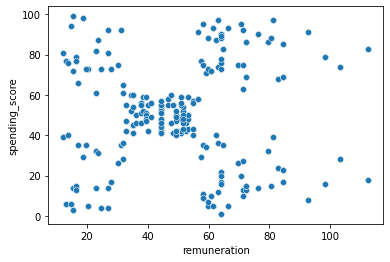

In [14]:
# Create a scatterplot with Seaborn.

sns.scatterplot(x='remuneration', y='spending_score',data=Reviews_clean)


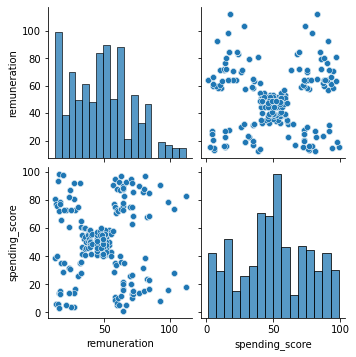

In [15]:
# Create a pairplot with Seaborn.
x=Reviews_clean[['remuneration','spending_score']]
sns.pairplot(Reviews_clean,vars=x)

## 3. Elbow and silhoutte methods

In [16]:
from sklearn.cluster import KMeans

In [17]:
# Determine the number of clusters: Elbow method.
cs=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

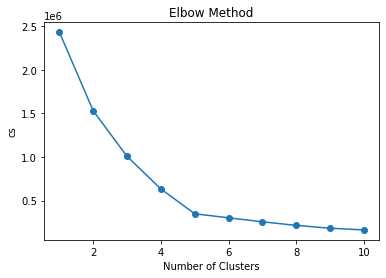

In [18]:
# Plotting the number of clusters: Elbow method.
plt.plot(range(1,11),cs,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('cs')
plt.show()

In [19]:
# Importing the relevant package
from sklearn.metrics import silhouette_score

#Creating an empty list to hold sihouette scores and setting maximum number of clusers
sil=[]
k_max=10

In [20]:
# Determine the number of clusters: Silhouette method.
for k in range(2,k_max+1):
    kmeans_s=KMeans(n_clusters=k).fit(x)
    labels=kmeans_s.labels_
    sil.append(silhouette_score(x,labels,metric='euclidean'))


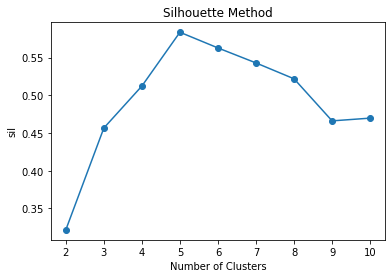

In [21]:
# Plotting the number of clusters: Silhouette method.
plt.plot(range(2,k_max+1),sil,marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('sil')
plt.show()

## 4. Evaluate k-means model at different values of *k*

   remuneration  spending_score  K-means Predicted
0         12.30              39                  3
1         12.30              81                  5
2         13.12               6                  3
3         13.12              77                  5
4         13.94              40                  3


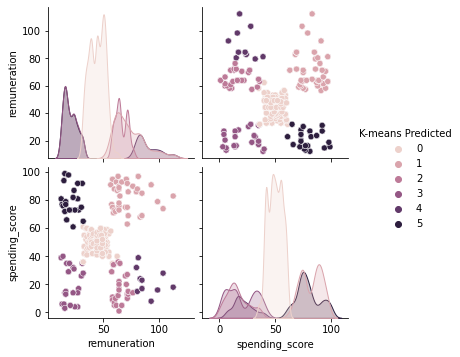

In [22]:
kmeans=KMeans(n_clusters=6,max_iter=15000,init='k-means++',random_state=0)
kmeans.fit(x)
clusters=kmeans.labels_
x['K-means Predicted']=clusters

sns.pairplot(x,hue='K-means Predicted', diag_kind='kde')

x['K-means Predicted'].value_counts()
print(x.head())

   remuneration  spending_score  K-means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


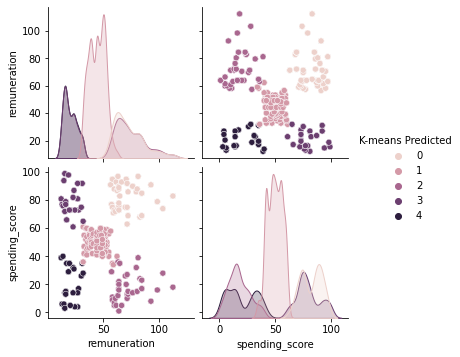

In [23]:
kmeans=KMeans(n_clusters=5,max_iter=15000,init='k-means++',random_state=0)
kmeans.fit(x)
clusters=kmeans.labels_
x['K-means Predicted']=clusters

sns.pairplot(x,hue='K-means Predicted', diag_kind='kde')

x['K-means Predicted'].value_counts()
print(x.head())

## 5. Fit final model and justify your choice

The elbow and silhouette methods both indicate 5 clusters for these data. Increasing the number of clusters beyond five fails to add explanatory value. Reducing the number of clusters below five appears to substantially reduce explanatory value. Therefore, both methods converge on a five cluster solution. 

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

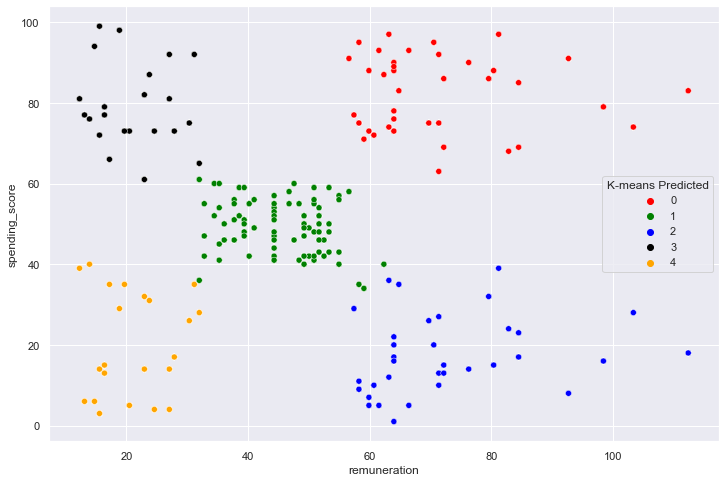

In [24]:
# Apply the final model.
sns.set(rc={'figure.figsize':(12,8)})

sns.scatterplot(x='remuneration',y='spending_score',data=x,hue='K-means Predicted',
               palette=['red','green','blue','black','orange'])


In [25]:
# Check the number of observations per predicted class.
x['K-means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-means Predicted, dtype: int64

## 6. Discuss: Insights and observations



The data appear to be clustered in regions of different shape and density. Because of this, a generalised method of k means would be preferred. For instance, clusters 0 and 2 pictured above seem to depart substantially from the assumption of sphericity. 
The identified clusters appear to indicate 5 groups of income X spending behaviour. Supringsinly, however, lower incomes appear to be clustered with both low (cluster 4) and high (cluster 3) spending levels. Similarly, higher incomes appear linked to both high (cluster 0) and low (cluster 2) spending levels. 
It would be informative to identify why income is distributed in this manner - what distinguishes a high income/high spending customer from a high income/low spending customer? Answering this question may help convert low spenders to higher spenders.

# 

# Week 3 assignment: NLP using Python


## 1. Load and explore the data

In [26]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [28]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import words
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')


nltk.download('stopwords')
nltk.download('words')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sabri\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [29]:
rev_summ=Reviews_clean[['review','summary']]
rev_summ.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [30]:
# Explore data set.
rev_summ.describe()

,review,summary
count,2000,2000
unique,1980,1432
top,love it,Five Stars
freq,5,378


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [31]:
# Review: Change all to lower case and join with a space.
rev_summ['review']=rev_summ['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [32]:
rev_summ['summary']=rev_summ['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [33]:
rev_summ.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [34]:
# Replace all the punctuations in review column.
rev_summ['review']=rev_summ['review'].str.replace('[^\w\s]','')

In [35]:
# Replace all the puncuations in summary column.
rev_summ['summary']=rev_summ['summary'].str.replace('[^\w\s]','')

In [36]:
rev_summ.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


### 2c) Drop duplicates in both columns

In [37]:
# Drop duplicates in both columns.
rev_summ=rev_summ.drop_duplicates()

## 3. Tokenize and create wordclouds

In [38]:
# Create new DataFrame (copy DataFrame).
rev_summ_token=rev_summ[['review','summary']]
rev_summ_token['token_reviews']=rev_summ_token['review'].apply(word_tokenize)
rev_summ_token['token_summ']=rev_summ_token['summary'].apply(word_tokenize)
rev_summ_token=rev_summ_token.reset_index()

# View DataFrame.
rev_summ_token.head()

,index,review,summary,token_reviews,token_summ
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [39]:
# Review: Create a word cloud.
textt=" ".join(review for review in rev_summ_token.review)
wordcloud=WordCloud(width=1600, height=900,
min_font_size=10).generate(textt)

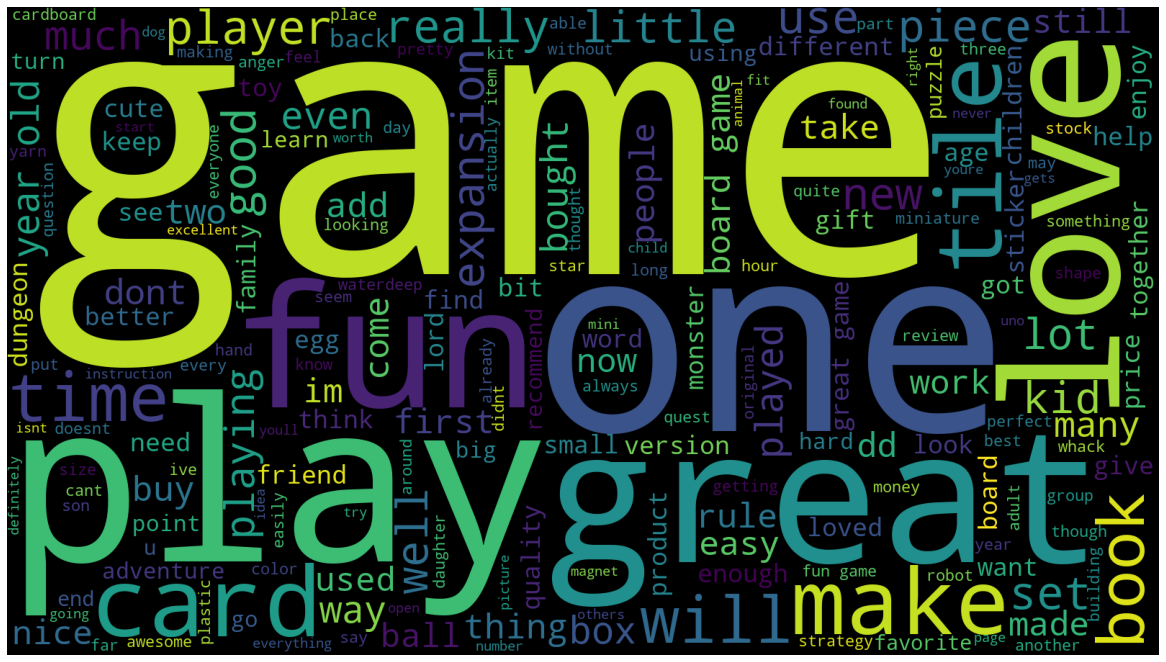

In [40]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(16,9),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [41]:
# Summary: Create a word cloud.
textt=" ".join(summary for summary in rev_summ_token.summary)
wordcloud=WordCloud(width=1600, height=900,
min_font_size=10).generate(textt)

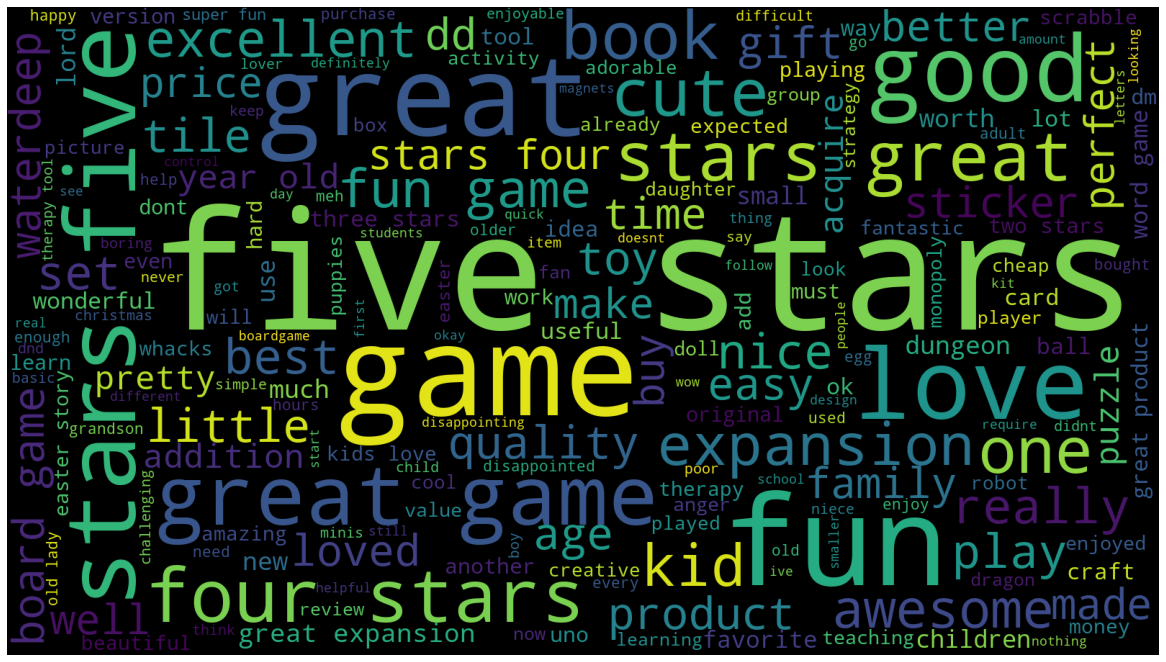

In [42]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(16,9),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [43]:
# Making a single list of all review words
all_tokens=[]
for i in range(rev_summ_token.shape[0]):
    all_tokens=all_tokens+rev_summ_token['token_reviews'][i]

In [44]:
# Determine the frequency distribution.
fdist=FreqDist(all_tokens)
fdist

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

### 4b) Remove alphanumeric characters and stopwords

In [45]:
#Makes a list of only alpha numeric words
tokens1=[word for word in all_tokens if word.isalnum()]

english_stopwords=set(stopwords.words('english'))

In [46]:
# Remove all the stopwords
tokens2=[x for x in tokens1 if x.lower() not in english_stopwords]
tokens2_string=''
for value in tokens2:
    tokens2_string=tokens2_string+ value+' '

### 4c) Create wordcloud without stopwords

In [47]:
# Create a word cloud without stop words.
wordcloud=WordCloud(width=1600,height=900,
min_font_size=5).generate(tokens2_string)

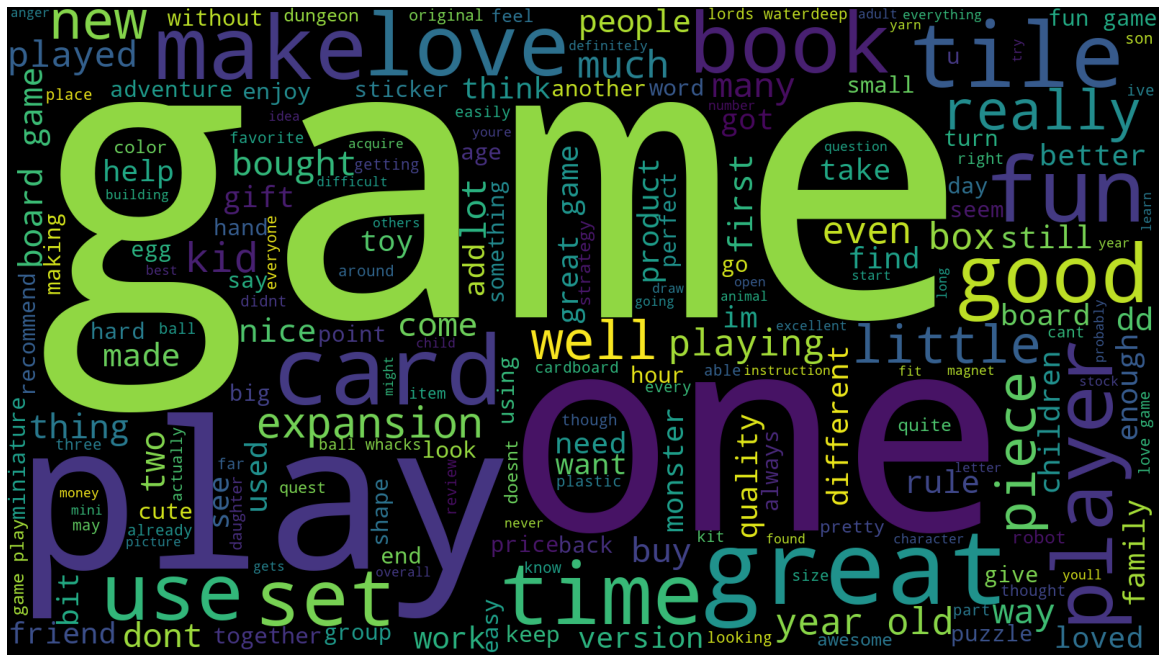

In [48]:
# Plot the WordCloud image.
plt.figure(figsize=(16,9),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 4d) Identify 15 most common words and polarity

In [49]:
# Determine the 15 most common words.
counts=pd.DataFrame(Counter(tokens2).most_common(30),
columns=['Word','Frequency']).set_index('Word')

counts

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [50]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [51]:
# Determine polarity of both columns. 
rev_summ_token['polarity_review']=rev_summ_token['review'].apply(generate_polarity)
rev_summ_token['polarity_summary']=rev_summ_token['summary'].apply(generate_polarity)


# View output.
rev_summ_token.head()

,index,review,summary,token_reviews,token_summ,polarity_review,polarity_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00


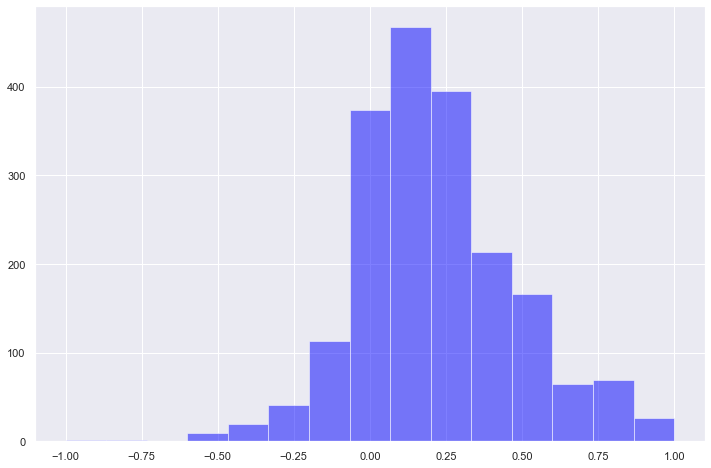

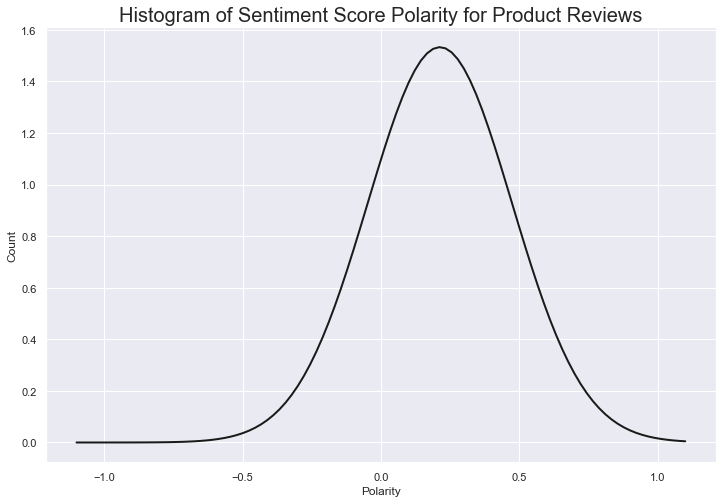

In [52]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

plt.hist(rev_summ_token['polarity_review'],bins=15,facecolor='blue',alpha=.5)

# Histogram of sentiment score
xmin,xmax=plt.xlim()
x=np.linspace(xmin,xmax,100)
mu,std=norm.fit(rev_summ_token['polarity_review'])
p=norm.pdf(x,mu,std)

plt.figure(figsize=(12,8))
plt.plot(x,p,'k',linewidth=2)
plt.xlabel('Polarity',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Histogram of Sentiment Score Polarity for Product Reviews',fontsize=20)
plt.show()

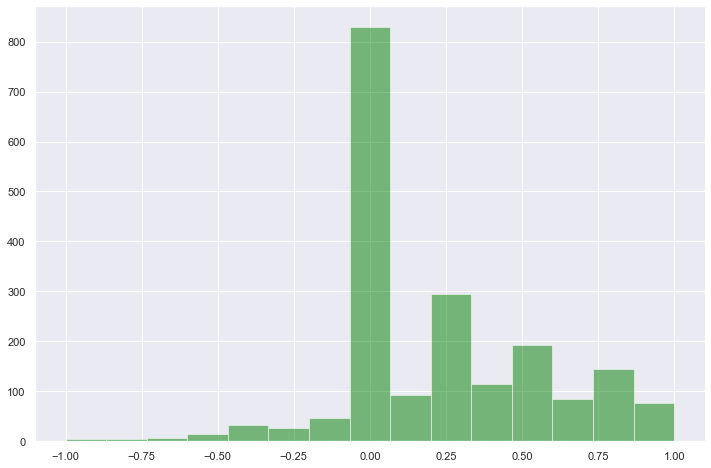

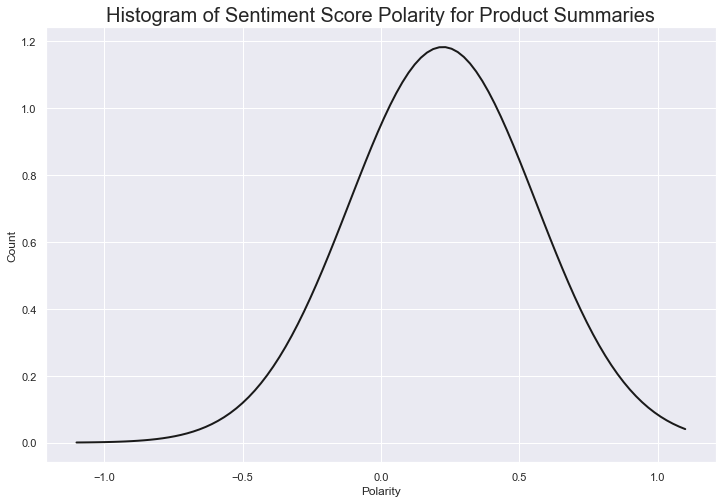

In [53]:
# Summary: Create a histogram plot with bins = 15.

# Histogram of polarity
plt.hist(rev_summ_token['polarity_summary'],bins=15,facecolor='green',alpha=.5)

# Histogram of sentiment score
xmin,xmax=plt.xlim()
x=np.linspace(xmin,xmax,100)
mu,std=norm.fit(rev_summ_token['polarity_summary'])
p=norm.pdf(x,mu,std)

plt.figure(figsize=(12,8))
plt.plot(x,p,'k',linewidth=2)
plt.xlabel('Polarity',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Histogram of Sentiment Score Polarity for Product Summaries',fontsize=20)
plt.show()




## 6. Identify top 20 positive and negative reviews and summaries respectively

In [54]:
# Top 20 negative reviews.
neg_sent_review=rev_summ_token.nsmallest(20,'polarity_review')
neg_sent_review_fin=neg_sent_review[['review','polarity_review']]
neg_sent_review_fin.style.set_properties(subset=['review'],**{'width':'1200px'})

# View output.
print(neg_sent_review_fin)

                                                 review  polarity_review
207   booo unles you are patient know how to measure...        -1.000000
181                   incomplete kit very disappointing        -0.780000
1773  im sorry i just find this product to be boring...        -0.583333
362   one of my staff will be using this game soon s...        -0.550000
116   i bought this as a christmas gift for my grand...        -0.500000
226   this was a gift for my daughter i found it dif...        -0.500000
229                    i found the directions difficult        -0.500000
289              instructions are complicated to follow        -0.500000
300                                           difficult        -0.500000
1501                         expensive for what you get        -0.500000
173   i sent this product to my granddaughter the po...        -0.491667
345   my 8 yearold granddaughter and i were very fru...        -0.446250
531   i purchased this on the recommendation of two

In [55]:
# Top 20 negative summaries.
neg_sent_summary=rev_summ_token.nsmallest(20,'polarity_summary')
neg_sent_summary_fin=neg_sent_summary[['summary','polarity_summary']]
neg_sent_summary_fin.style.set_properties(subset=['summary'],**{'width':'1200px'})

# View output.
print(neg_sent_summary_fin)

                                                summary  polarity_summary
21                        the worst value ive ever seen         -1.000000
207    boring unless you are a craft person which i am          -1.000000
819                                              boring         -1.000000
1148  before this i hated running any rpg campaign d...         -0.900000
1     another worthless dungeon masters screen from ...         -0.800000
143                                        disappointed         -0.750000
623                                        disappointed         -0.750000
785                                        disappointed         -0.750000
1591                                       disappointed         -0.750000
361   promotes anger instead of teaching calming met...         -0.700000
875            too bad this is not what i was expecting         -0.700000
880                        bad qualityall made of paper         -0.700000
177     at age 31 i found these very d

In [56]:
# Top 20 positive reviews.
pos_sent_review=rev_summ_token.nlargest(20,'polarity_review')
pos_sent_review_fin=pos_sent_review[['review','polarity_review']]
pos_sent_review_fin.style.set_properties(subset=['review'],**{'width':'1200px'})

# View output.
print(pos_sent_review_fin)

                                                 review  polarity_review
7                             came in perfect condition              1.0
164                                        awesome book              1.0
193                                        awesome gift              1.0
489   excellent activity for teaching selfmanagement...              1.0
517                         perfect just what i ordered              1.0
583                                   wonderful product              1.0
601                                  delightful product              1.0
613   wonderful for my grandson to learn the resurre...              1.0
782                                             perfect              1.0
923                                             awesome              1.0
1119                                        awesome set              1.0
1150               best set buy 2 if you have the means              1.0
1159               awesome addition to my rpg gm sy

In [57]:
# Top 20 positive summaries.
pos_sent_summary=rev_summ_token.nlargest(20,'polarity_summary')
pos_sent_summary_fin=pos_sent_summary[['summary','polarity_summary']]
pos_sent_summary_fin.style.set_properties(subset=['rsummary'],**{'width':'1200px'})

# View output.
print(pos_sent_summary_fin)

                                               summary  polarity_summary
6                                  best gm screen ever               1.0
28                                   wonderful designs               1.0
32                                             perfect               1.0
80   theyre the perfect size to keep in the car or ...               1.0
133                            perfect for preschooler               1.0
139             awesome sticker activity for the price               1.0
160                                       awesome book               1.0
162                    he was very happy with his gift               1.0
186                                            awesome               1.0
209           awesome and welldesigned for 9 year olds               1.0
412                                            perfect               1.0
468                                          excellent               1.0
536                                          excell

## 7. Discuss: Insights and observations

***Your observations here...***

A sentiment analysis was conducted on a sample of product reviews and product review summaries. This type of analysis can gauge the relative positivity/negativity of open-ended written product feedback. Therefore, a sentiment analysis can be a useful way to estimate whether customers feel primarily positive or negative about their purchases.

Each review or review summary was assigned a polarity score, which can range from -1 (most negative) to 1 (most positive). The histograms for reviews and summaries have positive peaks, indicating that reviews were most frequently neutral to positive. Both reviews and summaries also tended to have a greater number of positive polarity scores than negative ones (shown by the fatter right side of each distribution). So, overall, customer satisfaction appears positive.

This analysis was followed up by examining the top 20 negative reviews/summaries and the top 20 positive reviews/summaries. On the negative side, several reviews and summaries indicate disatisfaction with some aspect of instructions or assembly. This may be an area to investigate further to see whether this is a general issue across product types or whether these comments tend to refer to a similar set of products. There may be a simple adjustment to make that could increase future satisfaction.

The positive reviews/summaries are somewhat less informative at face value. Again, it may be useful to see how these reviews are distributed across products. Are there some that tend to be associated with the most positive reviews? One final thing to note is the distribution of polarity scores that can be seen in these tables. The positive reviews/summaries have max positive ratings across all twenty top results, whereas the negative reviews/summaries have max ratings that quickly fall away from the extreme negativ end of the scale. This result again reinforces the overall more positive tone of these reviews/summaries.

## Weeks 4-6 saved in r data file as IRKernel couldn't find jupyter